In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [3]:
s=pd.read_csv('smartphone.csv')
s

,Name,OS,Capacity,Ram,Weight,Company,inch
0,Galaxy S10,Android,128,8,163.0,Samsung,6.2
1,Lumia 950,windows,32,3,150.0,Microsoft,5.2
2,Xpreia 1 ll,Android,256,8,181.0,Sony,6.5
3,iphone13,ios,128,2,138.0,Apple,4.7
4,U Ultra,Android,64,4,170.0,HTC,5.7
5,Galaxy S8,Android,16,2,145.0,Samsung,5.1
6,iphone 11 pro max,ios,256,4,226.0,Apple,6.5
7,Moto G5,Android,16,3,144.5,Motorola,5.0
8,Pixel,Android,128,4,143.0,Google,5.0


In [3]:
x=s.Ram.value_counts()
x

4    3
8    2
3    2
2    2
Name: Ram, dtype: int64

In [4]:
category=x.index
category


Int64Index([4, 8, 3, 2], dtype='int64')

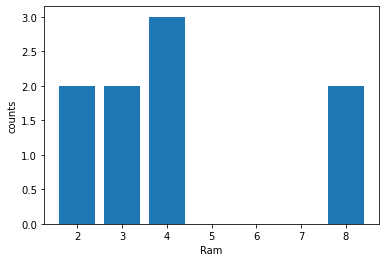

In [5]:
plt.bar(category,x)
plt.xlabel('Ram')
plt.ylabel('counts')
#plt.yticks([1,2,3])
plt.show()


In [6]:
def ECDF(data):
    n=len(data)
    x=np.sort(data)
    y=np.arange(1,n+1)/n
    return x, y
    

In [7]:
x,y=ECDF(s.inch)


In [8]:
x

array([4.7, 5. , 5. , 5.1, 5.2, 5.7, 6.2, 6.5, 6.5])

In [9]:
y

array([0.11111111, 0.22222222, 0.33333333, 0.44444444, 0.55555556,
       0.66666667, 0.77777778, 0.88888889, 1.        ])

Text(0, 0.5, 'ECDF')

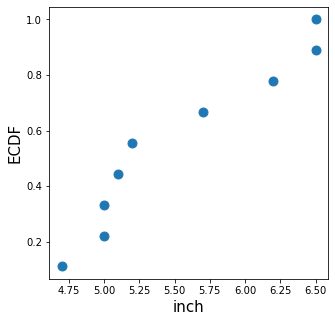

In [10]:
plt.figure(figsize=(5,5))
plt.scatter(x,y,s=80)
plt.margins(0.05)
plt.xlabel('inch',fontsize=15)
plt.ylabel('ECDF',fontsize=15)

In [11]:
np.mean(s.inch)

5.544444444444444

In [12]:
np.median(s.inch)

5.2

In [13]:
np.percentile(s.inch,[25,50,75])


array([5. , 5.2, 6.2])

In [14]:
np.var(s.inch)

0.4335802469135802

In [15]:
np.std(s.inch)

0.6584681062235135

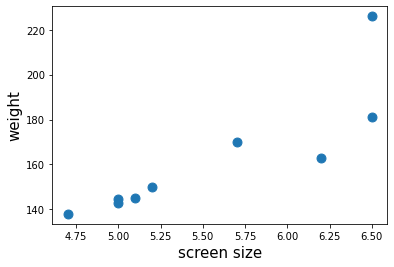

In [16]:
plt.scatter(s.inch,s.Weight,s=80)
plt.margins(0.05)
plt.xlabel('screen size',fontsize=15)
plt.ylabel('weight',fontsize=15)
plt.show()

In [17]:
np.mean(s.inch)


5.544444444444444

In [18]:
np.mean(s.Weight)


162.27777777777777

In [19]:
np.cov(s.inch,s.Weight)

array([[4.87777778e-01, 1.66298611e+01],
       [1.66298611e+01, 7.74694444e+02]])

In [20]:
from scipy.stats import pearsonr


In [21]:
p_coeff,p_value=pearsonr(s.inch,s.Weight)


In [22]:
p_coeff


0.8554849938477145

In [23]:
n=s.drop(['Name','OS','Capacity','Ram','Company'],axis=1)
n


,Weight,inch
0,163.0,6.2
1,150.0,5.2
2,181.0,6.5
3,138.0,4.7
4,170.0,5.7
5,145.0,5.1
6,226.0,6.5
7,144.5,5.0
8,143.0,5.0


In [24]:
cor=n.corr()
cor


,Weight,inch
Weight,1.000000,0.855485
inch,0.855485,1.000000


<AxesSubplot:>

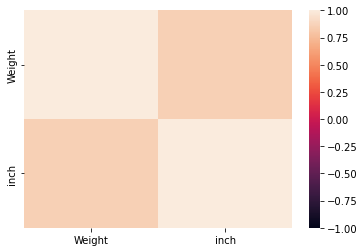

In [25]:
sb.heatmap(cor,xticklabels=cor.columns,yticklabels=cor.columns,vmin=-1,vmax=1)


In [26]:
c=s.drop(['Name','Capacity','Weight','inch','Company'],axis=1)
c


,OS,Ram
0,Android,8
1,windows,3
2,Android,8
3,ios,2
4,Android,4
5,Android,2
6,ios,4
7,Android,3
8,Android,4


In [27]:
from scipy.stats import spearmanr


In [28]:
p_coeff,p_value=spearmanr(s.Capacity,s.Ram)


In [29]:
p_coeff


0.6387727180404934

In [30]:
t=pd.crosstab(s.OS,s.Ram)
t

Ram,2,3,4,8
OS,,,,
Android,1,1,2,2
ios,1,0,1,0
windows,0,1,0,0


In [31]:
from scipy.stats import chi2_contingency

In [32]:
chi,p_value,dof,tabel_ex=chi2_contingency(t.values)

In [33]:
chi

5.75

In [34]:
p_value

0.45176986712009226

In [35]:
dof

6

In [36]:
tabel_ex

array([[1.33333333, 1.33333333, 2.        , 1.33333333],
       [0.44444444, 0.44444444, 0.66666667, 0.44444444],
       [0.22222222, 0.22222222, 0.33333333, 0.22222222]])